In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist

cmap = 'gray'

# Question1

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Question 2

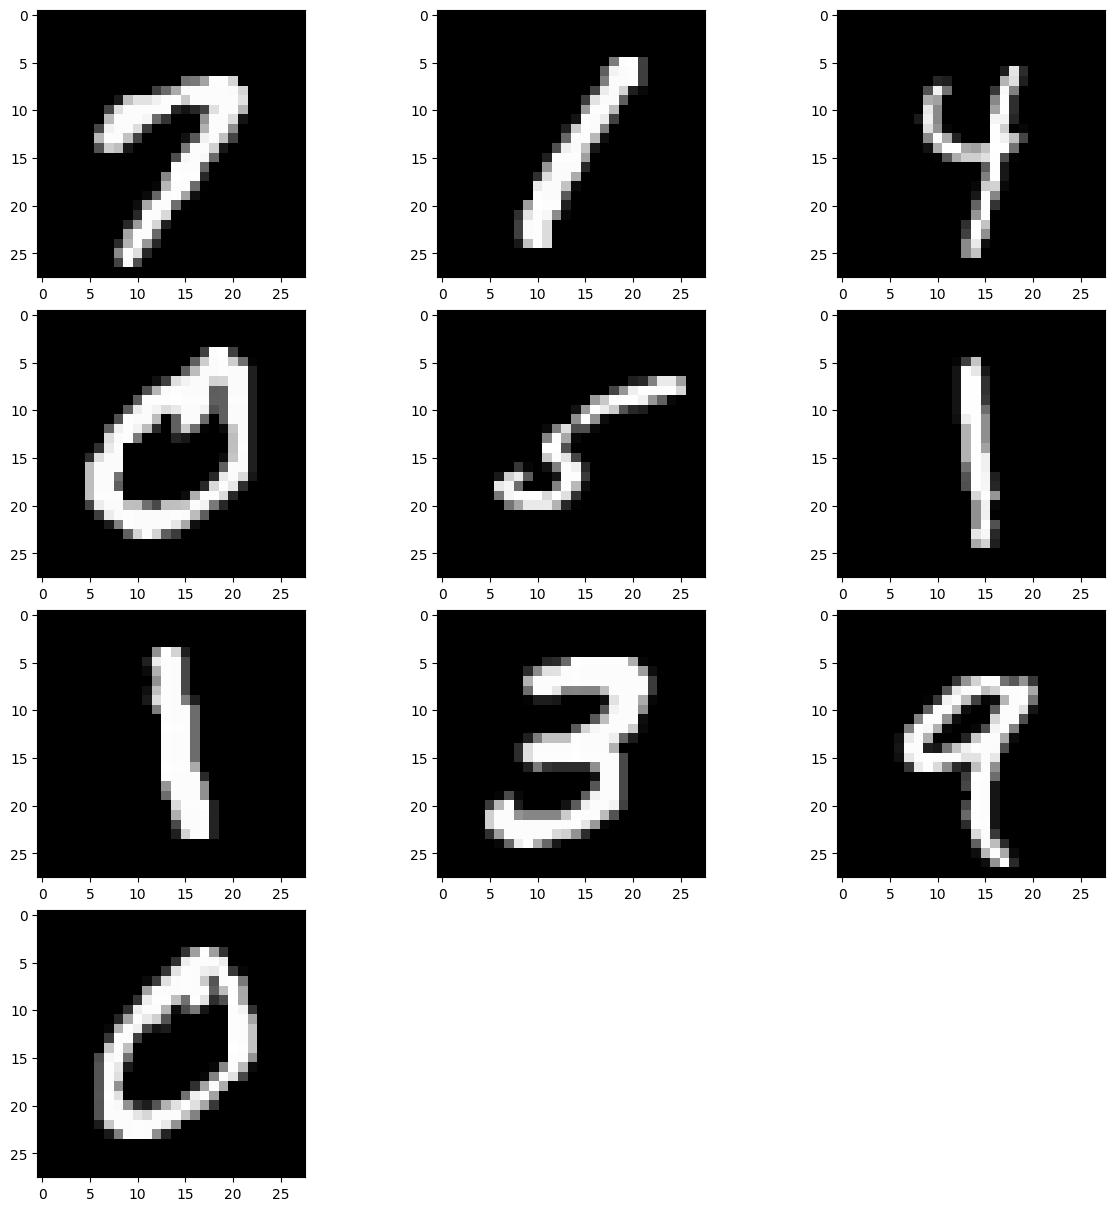

In [18]:
n_it = 10
cols_per_row = 3
n_rows = 4
width_per_plot = 4
height_per_plot = 3
fig, axs = plt.subplots(n_rows, cols_per_row, figsize=(width_per_plot * cols_per_row, height_per_plot * n_rows),
                        constrained_layout=True)

rand_indexes = np.random.randint(0, x_train.shape[1], n_it)
for i, r in zip(range(n_it), rand_indexes):
    axis_indexes = np.unravel_index(i, axs.shape)  # subplot index for column
    ax = axs[axis_indexes]
    ax.imshow(x_train[r], cmap=cmap)

# hide empty plots (4x3 grid)
for i in range(n_it, n_rows * cols_per_row):
    axis_indexes = np.unravel_index(i, axs.shape)
    axs[axis_indexes].set_visible(False)

# Question 3

In [19]:
x_train.shape

(60000, 28, 28)

Each picture in the dataset is 28 x 28 pixels.
Not all pixels are useful since edge pixels for example represent no information.

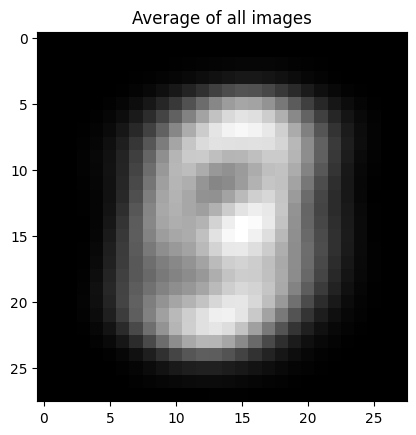

In [20]:
mean_image = np.mean(x_train, axis=0)
plt.imshow(mean_image, cmap=cmap)
plt.title('Average of all images')
plt.show()

# Question 4

In [21]:
x_train_vec = x_train.reshape(x_train.shape[0], -1)
x_test_vec = x_test.reshape(x_test.shape[0], -1)

# Question 5

In [22]:
k_list = [5, 15, 51, int(np.sqrt(x_train_vec.shape[1]))]
accuracies5 = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_vec, y_train)
    y_pred = model.predict(x_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies5.append(accuracy)

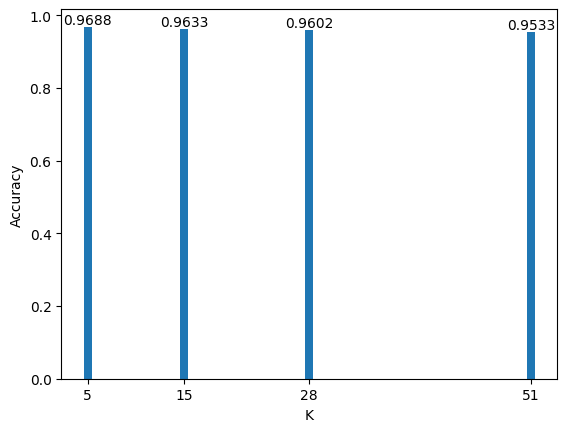

In [23]:
p = plt.bar(k_list, accuracies5)
plt.xlabel('K')
plt.xticks(k_list)
plt.ylabel('Accuracy')
plt.bar_label(p, labels=accuracies5)
plt.show()

# Question 6

In [24]:
x_train_normalized = x_train_vec / 255
x_test_normalized = x_test_vec / 255
accuracies6 = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_normalized, y_train)
    y_pred = model.predict(x_test_normalized)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies6.append(accuracy)

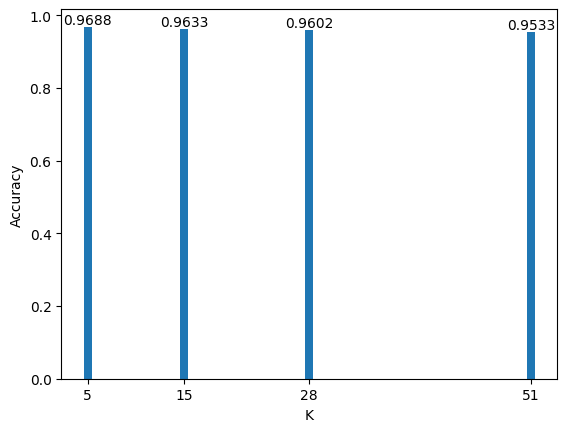

In [25]:
p = plt.bar(k_list, accuracies6)
plt.xlabel('K')
plt.xticks(k_list)
plt.ylabel('Accuracy')
plt.bar_label(p, labels=accuracies6)
plt.show()

Results are the same since KNN uses distance between points to classify, dividing all pixel values by 255 scales this distance proportionally.

# Question 7

In [27]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_vec, y_train)

Accuracy: 0.97


In [29]:
y_pred = model.predict(x_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9688


(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  43  74 102 109 117 125 127 120  95  36
    4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 141 181 155 131 123 114 106 104 112 140 210
  159   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 168  79   0   0   0   0   0   0   0   0   0
  164  75   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 109 152   0   0   0   0   0   0   0   0   0
  119 109   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12 234  43   0   0   0   0   0   0   0   0
  120 108   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  86 162  27   0   0  

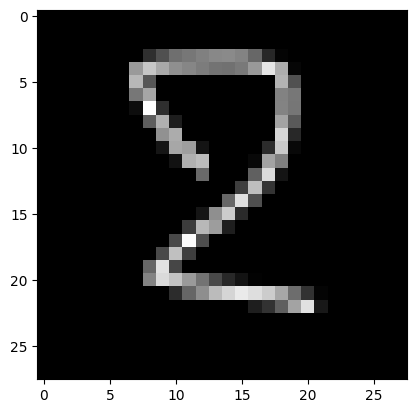

In [44]:
img = Image.open("2.png")
img = img.convert("L")  # grayscale

handwritten_2 = np.array(img)
plt.imshow(handwritten_2, cmap=cmap)

In [45]:
handwritten_2_vec = handwritten_2.reshape(1, -1)
handwritten_2_predict = model.predict(handwritten_2_vec)
print(handwritten_2_predict)

[1]


Handwritten image was classified wrongly as 1, probably due to the thin lines I drawed for the number 2. KNN is distance based and as we convert images to vectors, a thin 2 has fewer pixel and becomes more similar to 1 (distance) than a thicker 2 in the training set.

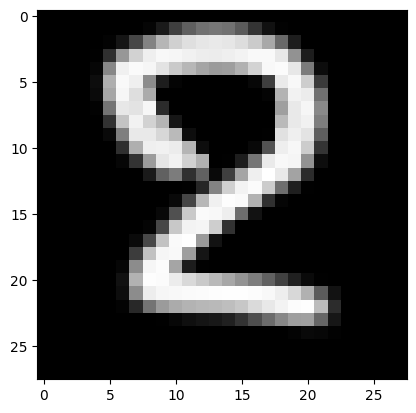

In [48]:
img = Image.open("2-thick.png")
img = img.convert("L")  # grayscale

handwritten_2 = np.array(img)
plt.imshow(handwritten_2, cmap=cmap)

In [49]:
handwritten_2_vec = handwritten_2.reshape(1, -1)
handwritten_2_predict = model.predict(handwritten_2_vec)
print(handwritten_2_predict)

[2]
